# Milestone 1

Milestone ini dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Fulltime Program khususnya pada Phase 1 dalam konsep Supervised Learning.

Milestone ini dibuat oleh Risqi Rahmatullah 007

## Description

### Data Description
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

**Input variables:**
- **bank client data:**
    - age (numeric)
    - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
    - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
    - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
    - default: has credit in default? (categorical: 'no','yes','unknown')
    - housing: has housing loan? (categorical: 'no','yes','unknown')
    - loan: has personal loan? (categorical: 'no','yes','unknown')

- **related with the last contact of the current campaign:**
    - contact: contact communication type (categorical: 'cellular','telephone')
    - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
    - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

- **other attributes:**
    - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    - previous: number of contacts performed before this campaign and for this client (numeric)
    - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

- **social and economic context attributes**
    - emp.var.rate: employment variation rate - quarterly indicator (numeric)
    - cons.price.idx: consumer price index - monthly indicator (numeric)
    - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
    - euribor3m: euribor 3 month rate - daily indicator (numeric)
    - nr.employed: number of employees - quarterly indicator (numeric)

**Output variable (desired target):**
- y - has the client subscribed a term deposit? (binary: 'yes','no')

Sumber: [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

## Sasaran Tugas
Milestones 1 ini dibuat guna mengevaluasi Pembelajaran Phase 1 dalam konsep Supervised Learning sebagai berikut:

- Mampu memahami konsep supervised learning
- Mampu mempersiapkan data untuk digunakan dalam model supervised learning
- Mampu mengimplementasikan supervised learning dengan data yang diberikan
- Mampu melakukan evaluasi model
- Mampu melakukan model tuning

## Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, roc_curve

## Pemuatan Data

In [3]:
bank = pd.read_csv('bank-additional/bank-additional-full.csv', sep=';')
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Pembersihan Data

Ada nama kolom yang mengandung tanda titik. Sebaiknya, ini diganti dengan garis bawah agar memudahkan saat _coding_.

In [5]:
# mengganti nama kolom
bank.columns = bank.columns.str.replace(".", "_", regex=False)
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

Berdasarkan informasi sumber data untuk menghilangkan kolom 'duration' saat data ini digunakan untuk model.

In [6]:
# menghapus kolom
bank.drop(['duration'], axis=1, inplace=True)

In [7]:
# cek nilai yang hilang
bank.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

Tidak ada nilai yang hilang pada data.

## Eksplorasi Data

In [8]:
bank.describe()

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
bank.describe(exclude=np.number)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [10]:
vc = bank.y.value_counts()
vc / vc.sum() * 100

no     88.734583
yes    11.265417
Name: y, dtype: float64

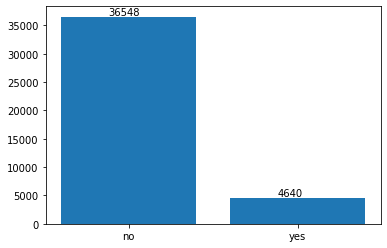

In [11]:
vc.index = vc.index.astype(str)
plt.bar(vc.index, vc)
xlocs, xlabs = plt.xticks()
for i, v in enumerate(vc):
    plt.text(xlocs[i]-0.12, v+300, str(v))
plt.show()

Proposi variabel target tidak seimbang. Jumlah nilai 'yes' 8x lebih kecil dibanding jumlah nilai 'no'

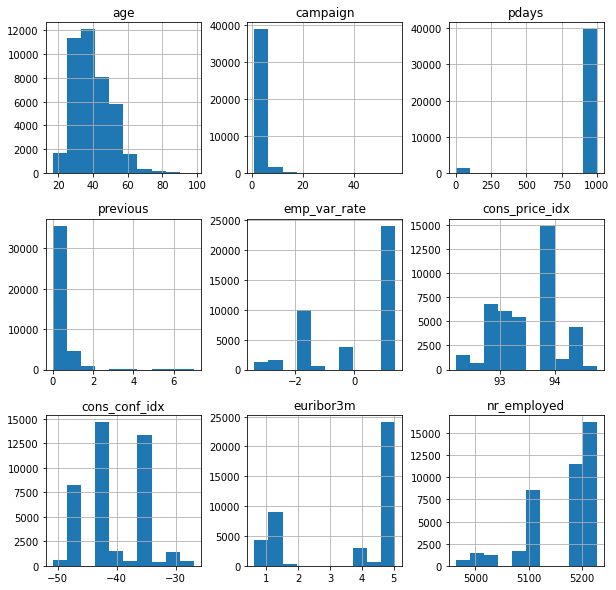

In [12]:
# melihat sebaran fitur numerik
bank.hist(figsize=(10,10))
plt.show()

Terlihat hanya kolom 'age' saja yang mendekati distribusi normal.

### Korelasi

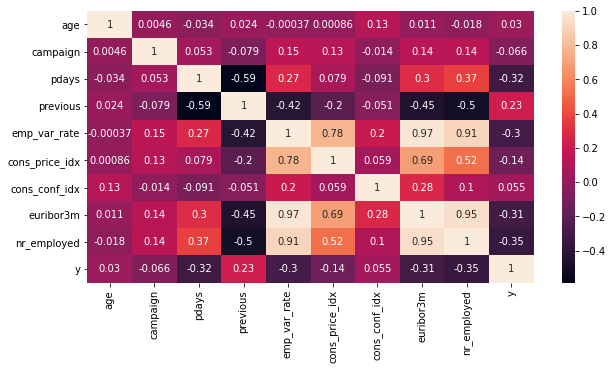

In [13]:
df = bank.copy()
df.loc[:,'y'].replace({'yes': 1, 'no': 0}, inplace=True)
# melihat korelasi data numerik dengan variabel target
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [14]:
# melihat korelasi data non numerik dengan variabel target
for col in list(df.select_dtypes(['object']).columns):
    print(col)
    display(pd.concat([pd.get_dummies(df[col]), df['y']], axis=1).corr()['y'])
    print()

job


admin.           0.031426
blue-collar     -0.074423
entrepreneur    -0.016644
housemaid       -0.006505
management      -0.000419
retired          0.092221
self-employed   -0.004663
services        -0.032301
student          0.093955
technician      -0.006149
unemployed       0.014752
unknown         -0.000151
y                1.000000
Name: y, dtype: float64


marital


divorced   -0.010608
married    -0.043398
single      0.054133
unknown     0.005211
y           1.000000
Name: y, dtype: float64


education


basic.4y              -0.010798
basic.6y              -0.023517
basic.9y              -0.045135
high.school           -0.007452
illiterate             0.007246
professional.course    0.001003
university.degree      0.050364
unknown                0.021430
y                      1.000000
Name: y, dtype: float64


default


no         0.099344
unknown   -0.099293
yes       -0.003041
y          1.000000
Name: y, dtype: float64


housing


no        -0.011085
unknown   -0.002270
yes        0.011743
y          1.000000
Name: y, dtype: float64


loan


no         0.005123
unknown   -0.002270
yes       -0.004466
y          1.000000
Name: y, dtype: float64


contact


cellular     0.144773
telephone   -0.144773
y            1.000000
Name: y, dtype: float64


month


apr    0.076136
aug   -0.008813
dec    0.079303
jul   -0.032230
jun   -0.009182
mar    0.144014
may   -0.108271
nov   -0.011796
oct    0.137366
sep    0.126067
y      1.000000
Name: y, dtype: float64


day_of_week


fri   -0.006996
mon   -0.021265
thu    0.013888
tue    0.008046
wed    0.006302
y      1.000000
Name: y, dtype: float64


poutcome


failure        0.031799
nonexistent   -0.193507
success        0.316269
y              1.000000
Name: y, dtype: float64

- Beberapa fitur numerik memiliki korelasi yang terhadap variabel target, meskipun masih tergolong rendah.
- Antara fitur juga terdapat korelasi (multikolinearitas) bahkan ada yang memiliki korelasi lebih tinggi dibanding variabel target.

## Pra-pemrosesan Data

Proporsi nilai variabel target tidak seimbang sehingga parameter 'stratify' digunakan dalam pemisahan data train dan data test.

In [15]:
X = bank.drop(['y'], axis=1)
y = bank['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3, stratify=y)

print('Jumlah data train:', X_train.shape[0])
print('Jumlah data test:', X_test.shape[0])

Jumlah data train: 28831
Jumlah data test: 12357


Pra-pemrosesan saat ini menggunakan salinan X_train untuk melihat hasil dari pra-pemrosesan. Pra-pemrosesan data X_train orisinal akan menggunakan pipeline.

In [16]:
# membuat salinan X_train untuk pra-pemrosesan data
X_train_raw = X_train.copy()

In [17]:
X_train_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28831 entries, 20930 to 1907
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             28831 non-null  int64  
 1   job             28831 non-null  object 
 2   marital         28831 non-null  object 
 3   education       28831 non-null  object 
 4   default         28831 non-null  object 
 5   housing         28831 non-null  object 
 6   loan            28831 non-null  object 
 7   contact         28831 non-null  object 
 8   month           28831 non-null  object 
 9   day_of_week     28831 non-null  object 
 10  campaign        28831 non-null  int64  
 11  pdays           28831 non-null  int64  
 12  previous        28831 non-null  int64  
 13  poutcome        28831 non-null  object 
 14  emp_var_rate    28831 non-null  float64
 15  cons_price_idx  28831 non-null  float64
 16  cons_conf_idx   28831 non-null  float64
 17  euribor3m       28831 non-nu

In [18]:
# memisahkan fitur numerik dan non numerik
num_cols = list(X_train_raw.select_dtypes(np.number).columns)
cat_cols = list(X_train_raw.select_dtypes(['object']).columns)

### Penanganan Pencilan

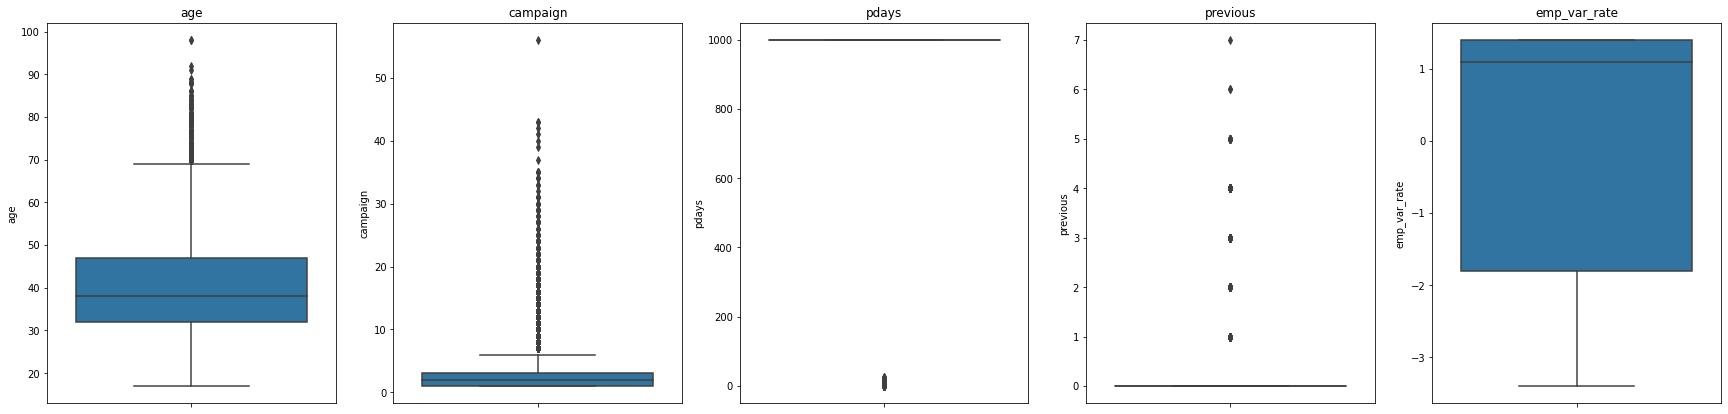

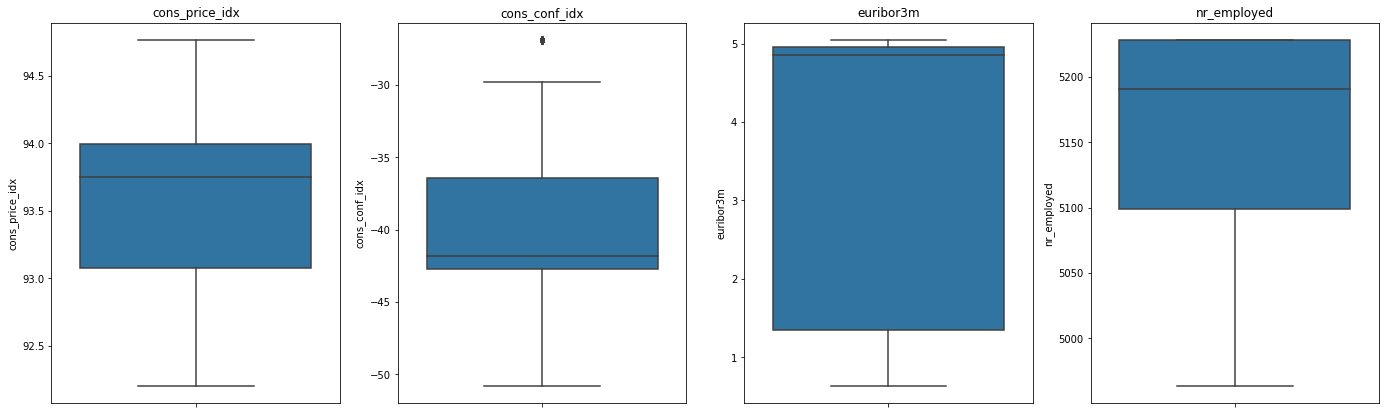

In [19]:
# melihat pencilan secara visual
for i in range(2):
    plt.figure(figsize=(30, 7))
    for col in num_cols[i*5:(i+1)*5]:
        ind = num_cols.index(col)
        pos = (ind+1) % 5 if ind != 4 else 5
        plt.subplot(1, 5, pos)
        sns.boxplot(y=X_train_raw[col])
        plt.title(col)
    plt.show()

In [20]:
# melihat pencilan setiap kolom numerik
for col in num_cols:
    q1 = X_train_raw[col].quantile(0.25)
    q3 = X_train_raw[col].quantile(0.75)
    IQR = q3 - q1
    lower = q1 - 1.5 * IQR
    upper = q3 + 1.5 * IQR
    outliers = len(X_train_raw[(X_train_raw[col] < lower) | (X_train_raw[col] > upper)])
    if outliers > 0:
        print(f'-----{col}-----')
        print('lower:', lower, 'upper:', upper)
        print('jumlah outlier:', outliers)
        print(f'persentase outlier: {(outliers/len(X_train_raw) * 100):,.2f}%')
        print()

-----age-----
lower: 9.5 upper: 69.5
jumlah outlier: 325
persentase outlier: 1.13%

-----campaign-----
lower: -2.0 upper: 6.0
jumlah outlier: 1647
persentase outlier: 5.71%

-----pdays-----
lower: 999.0 upper: 999.0
jumlah outlier: 1063
persentase outlier: 3.69%

-----previous-----
lower: 0.0 upper: 0.0
jumlah outlier: 3953
persentase outlier: 13.71%

-----cons_conf_idx-----
lower: -52.150000000000006 upper: -26.949999999999992
jumlah outlier: 320
persentase outlier: 1.11%



Ada beberapa kolom yang memiliki pencilan. Oleh karena jumlah data sedikit dan menghindari informasi hilang terlalu banyak, penanganan pencilan menggunakan metode Winsorizer.

In [21]:
winso = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=list(num_cols))
X_train_raw = winso.fit_transform(X_train_raw)
X_train_raw.describe()

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,28831.000000,28831.000000,28831.0,28831.0,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000
mean,39.959228,2.274670,999.0,0.0,0.079890,93.575607,-40.498786,3.617604,5166.837841
std,10.126416,1.549215,0.0,0.0,1.571319,0.578277,4.629938,1.736384,72.357745
min,17.000000,1.000000,999.0,0.0,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,1.000000,999.0,0.0,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,2.000000,999.0,0.0,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,3.000000,999.0,0.0,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,69.500000,6.000000,999.0,0.0,1.400000,94.767000,-26.950000,5.045000,5228.100000


Nilai unik pada kolom 'pdays' dan 'previous' hanya berjumlah 1, sehingga tidak diperlukan dalam model.

In [22]:
# menghapus kolom dalam data
X_train_raw.drop(['pdays', 'previous'], axis=1, inplace=True)

# menghapus kolom dalam daftar kolom numerik
drop_cols = ['pdays', 'previous']
num_cols = [e for e in num_cols if e not in drop_cols]

### Feature Scaling

Sebagian besar fitur numerik tidak terdistribusi normal sehingga metode _feature scaling_ yang digunakan dalah normalisasi (_Min Max Scaler_).

In [23]:
# normalisasi
norm = MinMaxScaler()
X_train_raw[num_cols] = norm.fit_transform(X_train_raw[num_cols])

### Encoding

In [24]:
ohenc = OneHotEncoder(sparse=False, handle_unknown='ignore')
ohenc.fit(X_train_raw[cat_cols])
ohenc_cols = list(ohenc.get_feature_names())
X_train_raw[ohenc_cols] = ohenc.transform(X_train_raw[cat_cols])

X_train_raw.drop(cat_cols, axis=1, inplace=True)

#### _Label Encoding_

In [25]:
lenc = LabelEncoder()
y_train = lenc.fit_transform(y_train)
y_test = lenc.transform(y_test)

### _Pipeline_

#### _Pipeline_ untuk model yang sensitif pencilan dan _feature scaling_

Dalam tugas ini, ada beberapa model yang harus digunakan sensitif terhadap pencilan dan _feature scaling_, sehingga penanganan pencilan akan dikhususkan pada model tersebut.

In [26]:
num_cols = list(X_train.select_dtypes(np.number).columns)
cat_cols = list(X_train.select_dtypes(['object']).columns)
# seleksi fitur/hapus kolom hasil dari penanganan pencilan
drop_cols = ['pdays', 'previous']
num_cols = [e for e in num_cols if e not in drop_cols]

# model sensitif pencilan dan feature scaling
num_pipe = Pipeline([
    ('winso', Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=num_cols, missing_values='ignore')),
    ('norm_scaler', MinMaxScaler())
    ])

cat_pipe = Pipeline([
    ('encoder', OneHotEncoder(sparse=False, handle_unknown='ignore'))
    ])

sensitive_pipe = ColumnTransformer([
    ("num", num_pipe, num_cols),
    ("cat", cat_pipe, cat_cols),
    ])

#### _Pipeline_ untuk model yang tidak sensitif pencilan dan _feature scaling_

In [27]:
cat_pipe = Pipeline([
    ('encoder', OneHotEncoder(sparse=False, handle_unknown='ignore'))
    ])

nonsens_pipe = ColumnTransformer([
    ("cat", cat_pipe, cat_cols),
    ])

## Pendefinisian Model

### Model yang Sensitif Pencilan dan _Feature Scaling_

In [28]:
# Logistic Regression
logr_pipe = Pipeline([
    ("sensitive_prep", sensitive_pipe),
    ("logreg", LogisticRegression(max_iter=1000))
    ])

Saya mengatur parameter max_iter bernilai 1000 (nilai bawaan 100) pada regresi logistik karena saat mencoba menjalankan model ini, selalu muncul peringatan: TOTAL NO. of ITERATIONS REACHED LIMIT.

In [29]:
# Support Vector Machines (SVM)
svm_pipe = Pipeline([
    ("sensitive_prep", sensitive_pipe),
    ("svm", SVC())
    ])

In [30]:
# K-Nearest Neighbour (KNN)
knn_pipe = Pipeline([
    ("sensitive_prep", sensitive_pipe),
    ("knn", KNeighborsClassifier())
    ])

### Model yang Tidak Sensitif Pencilan dan _Feature Scaling_

In [31]:
# Decision Tree
dtc_pipe = Pipeline([
    ("nonsensitive_prep", nonsens_pipe),
    ("dectree", DecisionTreeClassifier())
    ])

In [32]:
# Random Forest
rfc_pipe = Pipeline([
    ("nonsensitive_prep", nonsens_pipe),
    ("randfor", RandomForestClassifier())
    ])

In [33]:
# Naive Bayes
gnb_pipe = Pipeline([
    ("nonsensitive_prep", nonsens_pipe),
    ("gausnb", GaussianNB())
    ])

In [34]:
# Ada Boost
adab_pipe = Pipeline([
    ("nonsensitive_prep", nonsens_pipe),
    ("adaboost", AdaBoostClassifier())
    ])

In [35]:
# Gradient Boost
grab_pipe = Pipeline([
    ("nonsensitive_prep", nonsens_pipe),
    ("gradboost", GradientBoostingClassifier())
    ])

## Pelatihan Model

In [36]:
model_pipelines = [logr_pipe, svm_pipe, knn_pipe, dtc_pipe, rfc_pipe, gnb_pipe, adab_pipe, grab_pipe]
model_names = [
    'LogisticRegression',
    'SVC',
    'KNeighborsClassifier',
    'DecisionTreeClassifier',
    'RandomForestClassifier',
    'GaussianNB',
    'AdaBoostClassifier',
    'GradientBoostingClassifier'
]
model_results = pd.DataFrame(index=model_names)

In [38]:
if len(model_pipelines) == len(model_names):
    for model, names in zip(model_pipelines, model_names):
        model.fit(X_train, y_train)
        ytrain_pred = model.predict(X_train) 
        ytest_pred = model.predict(X_test)
        model_results.loc[names, 'Akurasi Data Train'] = model.score(X_train, y_train)
        model_results.loc[names, 'Akurasi Data Test'] = model.score(X_test, y_test)
        model_results.loc[names, 'ROC AUC Data Train'] = roc_auc_score(y_train, ytrain_pred)
        model_results.loc[names, 'ROC AUC Data Test'] = roc_auc_score(y_test, ytest_pred)
        model_results.loc[names, 'Recall'] = recall_score(y_test, ytest_pred, pos_label=0) # fokus label 0
        model_results.loc[names, 'Skor F1'] = f1_score(y_test, ytest_pred, pos_label=0) # fokus label 0

Pada studi kasus data ini, model berusaha untuk memprediksi apakah klien sudah atau belum berlangganan deposito berjangka (_the client subscribed a term deposit_)? Prediksi ini digunakan untuk menentukan klien yang belum berlangganan dan akan dijadikan target promosi dari deposito berjangka sebuah bank. Sehingga, **model yang dibuat berfokus pada label 0 (label positif)**.

Model tentu bisa salah memprediksi klien belum berlangganan padahal sudah (FP/Type I Error) atau klien sudah berlangganan padahal belum (FN/Type II Error). Dalam studi kasus ini, kesalahan prediksi yang perlu kita minimalkan adalah salah memprediksi klien sudah berlangganan. Kesalahan tipe ini mengakibatkan bank kehilangan keuntungan dari peluang untuk mendapatkan pelanggan baru di deposito berjangka. Sehingga, **penilaian yang cocok digunakan terhadap model adalah _recall_**. Namun, penilaian lain tetap ditampilkan untuk melihat kinerja model secara keseluruhan.

In [39]:
model_results = model_results.sort_values('Recall', ascending=False)
model_results

,Akurasi Data Train,Akurasi Data Test,ROC AUC Data Train,ROC AUC Data Test,Recall,Skor F1
SVC,0.900628,0.901028,0.590005,0.593004,0.990606,0.946703
AdaBoostClassifier,0.895945,0.895525,0.576212,0.577046,0.988144,0.943774
GradientBoostingClassifier,0.900246,0.898600,0.594359,0.592577,0.987597,0.945310
LogisticRegression,0.899449,0.900218,0.604393,0.606347,0.985682,0.946037
KNeighborsClassifier,0.912733,0.888808,0.666578,0.595840,0.974008,0.939562
RandomForestClassifier,0.952308,0.884762,0.808894,0.599205,0.967807,0.937125
DecisionTreeClassifier,0.952308,0.867605,0.795454,0.593301,0.947378,0.927003
GaussianNB,0.775450,0.778101,0.688944,0.685240,0.805107,0.865575


- Ada empat model terbaik yaitu Support Vector Machine, Ada Boosting, Gradient Boosting, dan Logistic Regression. Keempat model tersebut memiliki akurasi data train dan data test yang sangat mirip. Nilai recall dari keempat model tersebut juga berkisar 0,99.
- Pada model KNeighbors, Random Forest, dan Decision Tree, skor akurasi data train dan data test terlihat cukup jauh berbeda. Hal ini menunjukkan model overfitting terhadap data train.
- Pada model Gaussian Naive Bayes, skor akurasi jauh berbeda dibandingkan model yang lain. Saya menduga bahwa ini terjadi karena terdapat multikolinearitas yang tinggi, karena model ini sensitif terhadap multikolinearitas.

## Evaluasi Model

### _Cross Validation_ Model yang _Overfitting_

Akurasi beberapa model yang overfitting diukur kembali menggunakan cross validation.

In [40]:
# KNeighborsClassifier
scores = cross_val_score(knn_pipe, X_train, y_train, cv=5)
print('Akurasi cross validation:', scores)
print('Rata-rata akurasi cross validatian:', round(np.mean(scores), 4))

Akurasi cross validation: [0.88885036 0.89021852 0.88900451 0.89212626 0.88345473]
Rata-rata akurasi cross validatian: 0.8887


In [41]:
# RandomForestClassifier
scores = cross_val_score(rfc_pipe, X_train, y_train, cv=5)
print('Akurasi cross validation:', scores)
print('Rata-rata akurasi cross validatian:', round(np.mean(scores), 4))

Akurasi cross validation: [0.88607595 0.881547   0.88241415 0.88692334 0.88050642]
Rata-rata akurasi cross validatian: 0.8835


In [42]:
# DecisionTreeClassifier
scores = cross_val_score(dtc_pipe, X_train, y_train, cv=5)
print('Akurasi cross validation:', scores)
print('Rata-rata akurasi cross validatian:', round(np.mean(scores), 4))

Akurasi cross validation: [0.86717531 0.86125564 0.86212279 0.86004162 0.86108221]
Rata-rata akurasi cross validatian: 0.8623


Rata-rata akurasi cross validation setiap model yang overfitting sudah terlihat tidak jauh berbeda dengan hasil akurasi data train sebelumnya. Namun, nilainya masih lebih rendah dibandingkan empat model terbaik yang telah didapatkan sebelumnya. Sehingga, selanjutnya pada tuning hyperparameter hanya dilakukan pada empat model terbaik saja.

### Tuning Hyperparameter

In [54]:
# Support Vector Machine
param_grid = {
    'svm__C': np.logspace(-4,4,3),
    'svm__gamma': np.logspace(-4,4,3)
}

grid_search = GridSearchCV(svm_pipe, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {}".format(grid_search.best_score_))

Best parameters: {'svm__C': 10000.0, 'svm__gamma': 0.0001}
Best cross-validation score: 0.8966390278608042


In [55]:
# AdaBoostClassifier
param_grid = {
    'adaboost__n_estimators': [10, 50, 100, 250, 500]
}

grid_adab = GridSearchCV(adab_pipe, param_grid, cv=5)
grid_adab.fit(X_train, y_train)
print('Ada Boost')
print("Best parameters: {}".format(grid_adab.best_params_))
print("Best cross-validation score: {}".format(grid_adab.best_score_))

Ada Boost
Best parameters: {'adaboost__n_estimators': 10}
Best cross-validation score: 0.8966737199662631


In [46]:
# GradientBoostingClassifier
param_grid = {
    'gradboost__n_estimators': [10, 50, 100],
    'gradboost__learning_rate': np.logspace(-4,4,3)
}

grid_grad = GridSearchCV(grab_pipe, param_grid, cv=5)
grid_grad.fit(X_train, y_train)
print('Gradient Boosting')
print("Best parameters: {}".format(grid_grad.best_params_))
print("Best cross-validation score: {}".format(grid_grad.best_score_))

Gradient Boosting
Best parameters: {'gradboost__learning_rate': 1.0, 'gradboost__n_estimators': 50}
Best cross-validation score: 0.8899794006601965


In [48]:
# LogisticRegression
param_grid = {
    'logreg__solver': ['liblinear', 'lbfgs'],
    'logreg__C': np.logspace(-4,4,5),
    'logreg__max_iter': [500, 1000, 5000]
}

grid_logr = GridSearchCV(logr_pipe, param_grid, cv=5)
grid_logr.fit(X_train, y_train)
print('Logistic Regression')
print("Best parameters: {}".format(grid_logr.best_params_))
print("Best cross-validation score: {}".format(grid_logr.best_score_))

Logistic Regression
Best parameters: {'logreg__C': 100.0, 'logreg__max_iter': 500, 'logreg__solver': 'liblinear'}
Best cross-validation score: 0.8987894692619104


Skor cross validatian tertinggi di antara keempat model di atas adalah Logistic Regression. Selanjut, parameter terbaik dari model ini akan kita coba lihat kinerja model secara detail pada berikut ini.

In [78]:
# fungsi untuk membuat confusion matrix
def conf_matrix(model_names, y_test, y_pred):
    plt.figure(figsize=(6, 6))
    plt.title(f'Confusion Matrix of {model_names}')
    ax = plt.subplot()
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, ax = ax, fmt = 'g', cmap=plt.cm.Blues)
    ax.set_xlabel('Label Prediksi')
    ax.set_ylabel('Label Aktual')
    plt.show()

In [79]:
# memasukkan parameter terbaik ke model logistic regression
best_params = grid_logr.best_params_
logr_pipe.set_params(**best_params)
logr_pipe.fit(X_train, y_train)
yb_pred = logr_pipe.predict(X_test)

In [80]:
# mengecek parameter yang telah dimasukkan
logr_pipe.named_steps['logreg']

LogisticRegression(C=100.0, max_iter=500, solver='liblinear')

----------   Logistic Regression   ----------


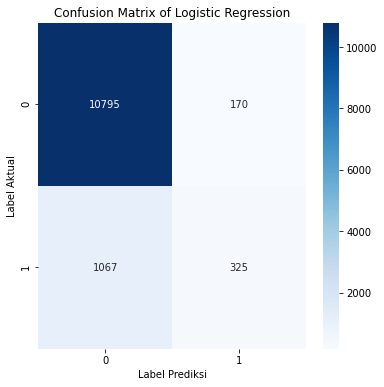

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.98      0.95     10965
           1       0.66      0.23      0.34      1392

    accuracy                           0.90     12357
   macro avg       0.78      0.61      0.65     12357
weighted avg       0.88      0.90      0.88     12357



In [81]:
# membuat confusion matrix dan classification report
names = "Logistic Regression"

print(f'----------   {names}   ----------')
conf_matrix(names, y_test, yb_pred)
print('Classification Report')
print(classification_report(y_test, yb_pred))

In [83]:
print('Akurasi Data Train:', logr_pipe.score(X_train, y_train))
print('Akurasi Data Test:', logr_pipe.score(X_test, y_test))
print('Recall:', recall_score(y_test, yb_pred, pos_label=0))
print('Skor F1:', f1_score(y_test, yb_pred, pos_label=0))

Akurasi Data Train: 0.8998300440498075
Akurasi Data Test: 0.8998947964716355
Recall: 0.9844961240310077
Skor F1: 0.9458097866561529


Hasil dari regresi logistik dengan parameter terbaik terlihat tidak jauh berbeda dengan parameter bawaan. Hasilnya juga masih belum lebih baik dari SVM, bahkan nilai recall lebih rendah dari parameter bawaan. Selanjutnya, mungkin parameter model SVM diatur kembali dengan parameter yang lebih luas, tetapi harus siap dengan waktu lebih. Serta, penilaian pada proses gridsearch bisa berfokus pada recall.

## Model Inference

In [90]:
# membuat data dummy
inf_df = pd.DataFrame(columns=bank.columns[:-1])

# membuat data random dari sebaran data dari data mentah
for col in bank.columns[:-1]:
    inf_df[col] = bank[col].sample(3).values

inf_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,31,admin.,married,basic.4y,no,no,no,cellular,may,fri,1,999,0,nonexistent,1.1,93.444,-42.0,4.961,5195.8
1,42,admin.,married,high.school,no,yes,no,cellular,aug,fri,2,999,0,nonexistent,1.4,93.918,-41.8,4.860,5228.1
2,27,management,married,professional.course,no,no,no,cellular,jul,mon,1,999,0,nonexistent,-1.8,92.893,-47.1,4.856,5076.2


In [91]:
# memprediksi data dummy
yinf_pred = logr_pipe.predict(inf_df)
yinf_pred = np.where(yinf_pred == 0, 'no', 'yes')
inf_df['y_prediction'] = yinf_pred
inf_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y_prediction
0,31,admin.,married,basic.4y,no,no,no,cellular,may,fri,1,999,0,nonexistent,1.1,93.444,-42.0,4.961,5195.8,no
1,42,admin.,married,high.school,no,yes,no,cellular,aug,fri,2,999,0,nonexistent,1.4,93.918,-41.8,4.860,5228.1,no
2,27,management,married,professional.course,no,no,no,cellular,jul,mon,1,999,0,nonexistent,-1.8,92.893,-47.1,4.856,5076.2,no


## Kesimpulan

- Pada parameter bawaan, ada empat model terbaik yaitu Support Vector Machine, Ada Boosting, Gradient Boosting, dan Logistic Regression (berurut sesuai nilai recall tertinggi). Nilai recall dari keempat model tersebut sekitar 0,99.
- Pada model KNeighbors, Random Forest, dan Decision Tree, skor akurasi data train dan data test terlihat cukup jauh berbeda. Hal tersebut menunjukkan model overfitting terhadap data train.
- Pada model Gaussian Naive Bayes, skor akurasi jauh berbeda dibandingkan model yang lain. Saya menduga bahwa ini terjadi karena terdapat hubungan korelasi antar fitur, karena model ini sensitif terhadap multikolinearitas.
- Setelah dilakukan tuning hyperparameter, regresi logistik memiliki nilai cross validation terbaik. Namun setelah parameter terbaik diuji kembali, nilai recallnya menurun dari parameter bawaan dan nilai akurasinya masih lebih rendah dibandingkan model SVM .
- Perlu dilakukan kembali analisa selanjutnya dengan mengatur parameter model SVM dengan lebih luas, tetapi harus siap dengan waktu yang lebih. Serta, acuan penilaian pada proses gridsearch bisa berfokus pada recall.